##  LASSO Regression

In [10]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

In [11]:
#1 Loading the data
# Using the provided file
dados = pd.read_excel('/Users/fabicampanari/Desktop/class_6-Lasso Regression/Regresao_Lasso_Ridge.xlsx')


In [12]:
# #2 Exploring the data
# Displaying the first rows
print(dados.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0    70   
1  15.0          8         350.0         165    3693          11.5    70   
2  18.0          8         318.0         150    3436          11.0    70   
3  16.0          8         304.0         150    3433          12.0    70   
4  17.0          8         302.0         140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [13]:
# #3 Removing irrelevant columns
# The 'name' column contains only the names of the cars and will be removed
dados = dados.drop('name', axis=1)


In [14]:
# #4 Normalizing the data
# Normalizing the predictor variables
normalizador = StandardScaler()
dados[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']] = normalizador.fit_transform(
    dados[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
)

In [16]:
# #5 Defining variables X and Y
# X represents the predictor variables, Y is the response variable
X = dados.drop('mpg', axis=1).values
Y = dados['mpg'].values


In [18]:
# #6 Applying LASSO Regression
# Initially with alpha=0.5
modelo1 = Lasso(alpha=0.5)
modelo1.fit(X, Y)


Lasso(alpha=0.5)

In [21]:
# #7 Evaluating the model
score = modelo1.score(X, Y)
print(f"Score com alpha=0.5: {score}")



Score com alpha=0.5: 0.8106452902609764


In [24]:
# #8 Testing different values of alpha (lambda)
lambdas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2, 5]
scores = []

for alpha in lambdas:
    modelo = Lasso(alpha=alpha)
    modelo.fit(X, Y)
    scores.append(modelo.score(X, Y))

print(scores)

[0.8214780763222865, 0.8214780604756535, 0.8214764579312891, 0.821321118294349, 0.8178082746620092, 0.8106452902609764, 0.7884085135656428, 0.7076161581319506, 0.281194071941259]


In [28]:
# Creating a DataFrame to visualize the results
df_scores = pd.DataFrame({'Lambda': lambdas, 'Score': scores})
print(df_scores.sort_values(by='Score', ascending=False))



    Lambda     Score
0  0.00001  0.821478
1  0.00010  0.821478
2  0.00100  0.821476
3  0.01000  0.821321
4  0.10000  0.817808
5  0.50000  0.810645
6  1.00000  0.788409
7  2.00000  0.707616
8  5.00000  0.281194


In [30]:
# #9 Choosing the best model
# The best lambda was 0.00001
modelo_final = Lasso(alpha=0.00001)
modelo_final.fit(X, Y)

Lasso(alpha=1e-05)

In [31]:
# #10 Making predictions
Y_pred = modelo_final.predict(X)

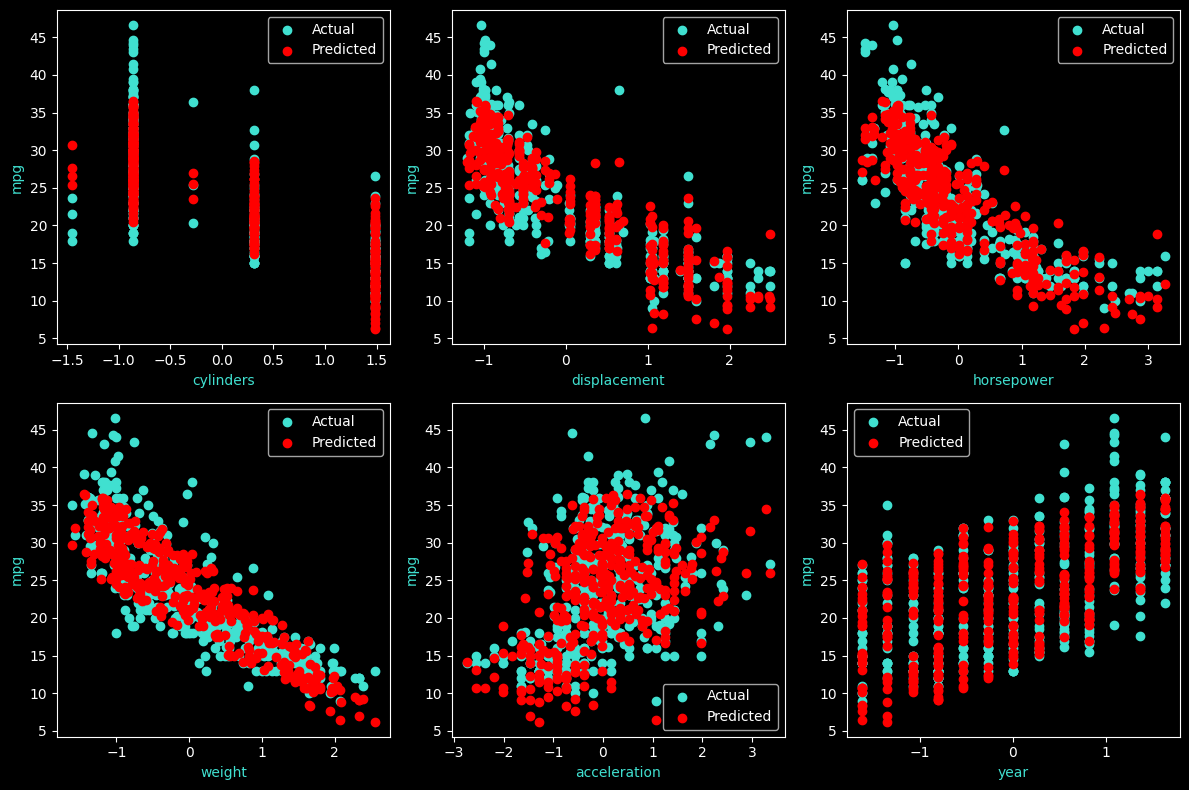

In [32]:
# #11 Comparing predictions with actual values
plt.style.use('dark_background')  # Activating dark mode
fig, ax = plt.subplots(2, 3, figsize=(12, 8), facecolor='black')

variables = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
for i, var in enumerate(variables):
    row, col = divmod(i, 3)
    ax[row, col].scatter(X[:, i], Y, color='turquoise', label='Actual')
    ax[row, col].scatter(X[:, i], Y_pred, color='red', label='Predicted')
    ax[row, col].set_xlabel(var, color='turquoise')
    ax[row, col].set_ylabel('mpg', color='turquoise')
    ax[row, col].legend()

plt.tight_layout()
plt.show()

In [39]:
# #12 Visualizando os coeficientes do modelo
# Ensuring the variables list matches the length of coeficientes
variables = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

coeficientes = modelo_final.coef_
df_coeficientes = pd.DataFrame({'Variável': variables, 'Coeficiente': coeficientes})
df_coeficientes = df_coeficientes.reindex(df_coeficientes['Coeficiente'].abs().sort_values(ascending=False).index)
print(df_coeficientes)

       Variável  Coeficiente
3        weight    -5.491919
5          year     2.762104
1  displacement     2.078849
6        origin     1.147269
0     cylinders    -0.840308
2    horsepower    -0.651556
4  acceleration     0.221988
